# Training for analysing data with python
## [Course Page](https://courses.edx.org/courses/course-v1:IBM+DA0101EN+3T2020/course/)

The goal here is to try and find some statistical way to decide what price I should sell my car for.  
The prices here are from about 20 years ago, so will no longer be accurate but the principles will be the same.

First, we start by importing the following modules,

pandas = creating the data array  
numpy + scipy = mathematical calculations  
scikit-learn = machine learning
matplotlib + seaborn = visualisations

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

Then we want to set our path to our data.
This was collected from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and stored locally 

In [2]:
path = "C:\\Users\\lukef\\Desktop\\Data_analytics\\imports-85.data"

We use Pandas to create a dataframe to store our data.  
The reason we use pandas is, it is far more efficient than native python dictionaries.  
It also opens up a large amount of options for manipulating the data, as we will see through the course of this notebook

Let's store the data in a data frame, df for short.
Currently, there are no headers for our data.

In [3]:
# create a data frame object
df = pd.read_csv(path, header = None)

We can find the headers [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) for the data and add them to the data set as follows.

In [4]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
           "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price" ]
df.columns=headers

We then want to save the modified data set as a separate csv file

In [5]:
path = "C:\\Users\\lukef\\Desktop\\Data_analytics\\automobile.csv"
df.to_csv(path)

# Let's take a look at our dataframe
Let's show the top 5 rows of the data

In [6]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We can show the data types   
Below Objects are stings

In [7]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

This is potentially better shown by using info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Let's start with some basic statistical analysis

Here we get the mean, standard-deviation, and the percentile splits of the columns

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


That only returned the columns with numerical values, we can force it to return for all

In [10]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


We now have some new statistics, such as unique, top and freq  
Notice that we now have allot of NaN (this shows no data available)  
This is due to not being able to calculate the mean of something like make.

# Data Clean-up

Given our goal is to analyse the features that determine price we do not want anything in our data set that does not contain a price.  
So let's remove them.

axis=0 for entire row , axis=1 for entire column  
subset means it only checks in that column  
inplace= True modifies the dataframe

In [11]:
df.dropna(subset=["price"], axis=0, inplace=True)

Another method of data Clean-up is to replace the NaN values with the mean value of that column.  
If we look at the normalized-losses column we see a lot of ?.  
We can find and replace those with NaN for the purposes of this example.

In [12]:
mean = df["normalized-losses"].mean()
print(mean)
df["normalized-losses"].replace(np.nan, mean)

122.0


0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 201, dtype: float64

We can of course just leave the data blank, or try to find a higher quality source, or manually update with additional information.

# Data Formatting

We may want to reformat our city-mpg from miles per gallon to liters per 100 km.
The conversion for this is to divide mpg by 235.
We then want to rename our column header to something more appropriate.

In [13]:
df[["make","body-style","city-mpg"]].head(5)

,make,body-style,city-mpg
0,alfa-romero,convertible,21
1,alfa-romero,convertible,21
2,alfa-romero,hatchback,19
3,audi,sedan,24
4,audi,sedan,18


In [14]:
df["city-mpg"] = 235 / df["city-mpg"]
df.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)

In [15]:
df[["make","body-style","city-L/100km"]].head(5)

,make,body-style,city-L/100km
0,alfa-romero,convertible,11.190476
1,alfa-romero,convertible,11.190476
2,alfa-romero,hatchback,12.368421
3,audi,sedan,9.791667
4,audi,sedan,13.055556


If we want to convert the data type of a column we use the following.

In [16]:
df["price"] =df["price"].astype("int")

# Data Normalisation
This is all about getting your data into similar ranges as an example.  
This prevents certain columns having a inaccurate amount of influence over the result.

![normalisation_image](images/normalisation.PNG)

Here are three equations to normalise the data
1. Simple Feature scaling:
We divide each value by the max value for that column
This will bring your values between 0 and 1
2. Min-Max:
We take each value and take away the min
This is then divided by the max - the min
This once again will bring our values between 0 and 1
3. Z-score:
We take each value and subtract the mean
We then divide by the standard deviation
This tends to give you values around 0, but will typically be between -3 and 3

![normalisation_approaches](images/approach.PNG)

Let's apply each in turn to our data set, in particular the length column

In [17]:
df[["make","body-style","length"]].head(5)

,make,body-style,length
0,alfa-romero,convertible,168.8
1,alfa-romero,convertible,168.8
2,alfa-romero,hatchback,171.2
3,audi,sedan,176.6
4,audi,sedan,176.6


In [18]:
l = df["length"]
# Simple Feature Scaling
l = l/l.max()
l

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 201, dtype: float64

In [19]:
# Min-Max
l = (l-l.min()) / (l.max()-l.min())
l

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 201, dtype: float64

In [20]:
# Z-score
l = (l-l.mean())/ l.std()
l

0     -0.438315
1     -0.438315
2     -0.243544
3      0.194690
4      0.194690
         ...   
200    1.184775
201    1.184775
202    1.184775
203    1.184775
204    1.184775
Name: length, Length: 201, dtype: float64

# Binning 
This is the practice of grouping data into data sets.  
For example grouping ages into,  
[0 to 5]  
[6 to 10]  
[11 to 15]  
etc.  

lets look to do this with our pricing column

<AxesSubplot:>

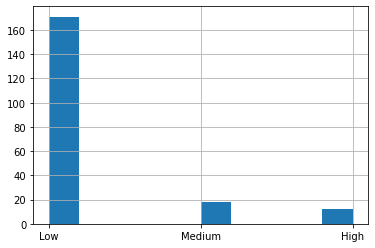

In [21]:
# split our price collum into 4 equal blocks, ranging from min to max
bins = np.linspace(min(df["price"]),max(df["price"]), 4)
# make a list of our group names
group_names = ["Low", "Medium", "High"]
# create our new column and populate it with our bins based on price
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)
# We can now plot this as a histogram
df["price-binned"].hist()

We may also want to convert our categorical data into quantitative data.  
One way of doing this is one-hot encoding  
For example with fuel we have the values gas and diesel.  
so a one represents that the element is present in the sample.  
![normalisation_approaches](images/one-hot.PNG)

In [22]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


# We will now start to explore the data more thoroughly
The goal is to 
- Summarise the main features
- Gain a better understanding of the data set
- Find relationships between variables
- Extract important variables

So for us our main question is

- What are the features that have the most impact on the car price?

One way we can do this is by use of a scatter plot.
Let's take a look at how engine size relates to price.


Text(0, 0.5, 'Price')

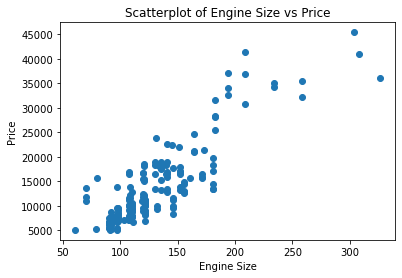

In [23]:
# set the y axis
y=df["price"]
# set the x axis
x=df["engine-size"]
# plot both using matplotlib scatter
plt.scatter(x,y)
# add titles and axis names
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

We may also want to group some of our data to see if these groups have any bearing on price.  
For example how does the drive-wheel and body style affect price

In [24]:
# first we make a new data frame
df_test = df[["drive-wheels", "body-style", "price"]]
# we then group the two chategories and get the mean of the price
df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


We can convert this to a pivot table 

In [25]:
df_test.pivot_table(index= "drive-wheels", columns="body-style")

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Another way to visualise this data is as a heat map.  
However in order to do that we first need to replace the NaN values

<function matplotlib.pyplot.show(close=None, block=None)>

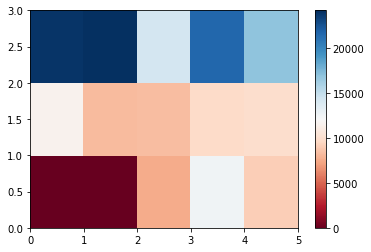

In [26]:
df_test = df_test.pivot_table(index= "drive-wheels", columns="body-style", fill_value=0)
plt.pcolor(df_test, cmap="RdBu")
plt.colorbar()
plt.show

We can also calculate the relationship between two values by using Pearson Correlation.

![Pearson_correlation](images/Pearson.PNG)

We want to look at the Pearson correlation between horsepower and price.  
We can do this simply by using the SciPy.  
But first we need to remove the NaN values from horsepower.  

In [27]:
df["horsepower"].isna().any()

True

In [28]:
df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)
df["horsepower"].isna().any()

False

Having completed the clean up let's take a look at the Pearson Correlation.

In [29]:
stats.pearsonr(df["horsepower"], df["price"])

(0.8096811975632285, 6.058444649710862e-48)

So we see we get a Pearson correlation of 0.81 and a P-value of 6.05 e-48  
This shows a strong positive correlation and that we have extreme certainty in the results.

We can represent this relationship between all features visually using a heat map.

<AxesSubplot:>

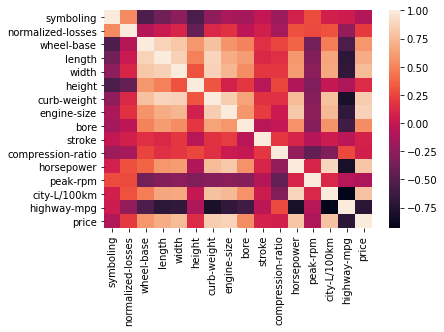

In [30]:
sns.heatmap(df.corr())

We can make this a little more tidy.  
Two parts of this data can be removed as they do not tell us anything.

1. The diagonal line of 1.0, as this is a 1:1 correlation of the same features
2. Everything to the top right of that diagonal as its a duplicate of the bottom left

<AxesSubplot:>

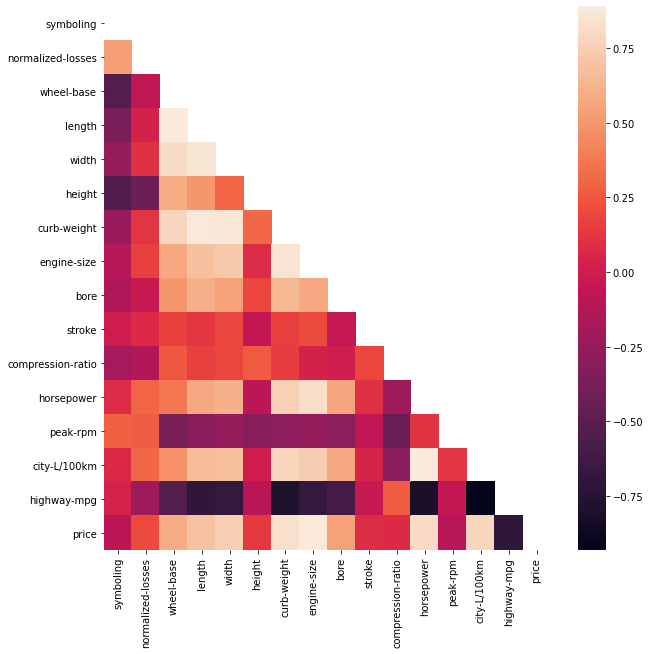

In [31]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize= (10,10))

sns.heatmap(df.corr(),
           mask = mask)

What we are really interested in is how price relates to the other features.  
and we can see that

Engine-size, horsepower and city L/100km have a strong positive correlation with price.  
Whereas highway-mpg, peak-rpm and symboling have a negative correlation with price.

# Next we will take a look at analysing variance

We can analyse the variance between different groups of a variable by using ANOVA

![Pearson_correlation](images/anova.PNG)
![Pearson_correlation](images/small-f.PNG)
![Pearson_correlation](images/large-f.PNG)



Let's conduct an ANOVA test between Honda and Subaru,

In [32]:
df_anova = df[["make", "price"]]
grouped_anova = df_anova.groupby(["make"])

stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

The low F value here shows us that there is a low amount of variance between Honda and Subaru when it comes to price.
Let's do the same for Honda and Jaguar.

In [33]:
stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

The large F value shows there is significant variance between Honda and Jaguar.

# We are now going to take a look at model development

A model takes independent variables as inputs, runs them though the model then outputs the prediction.  
We will be attempting to build a model to answer the question.

- What is a fair price to be assigned to a used car ?

### First we will take a look at Linear Regression and multiple linear regression.

![Pearson_correlation](images/reg1.PNG)

![Pearson_correlation](images/reg.PNG)

Let's look to do this with our dataset


In [34]:
print(df[["highway-mpg"]])

     highway-mpg
0             27
1             27
2             26
3             30
4             22
..           ...
200           28
201           25
202           23
203           27
204           25

[201 rows x 1 columns]


In [35]:
# import the module
from sklearn.linear_model import LinearRegression
# create a linear regression object
lm=LinearRegression()
# predictor variable
x = df[["highway-mpg"]]
# target variable
y = df[["price"]]
# then we train the model
lm.fit(x, y)

LinearRegression()

we can get the intercept

In [36]:
lm.intercept_

array([38423.30585816])

or the slope

In [37]:
lm.coef_

array([[-821.73337832]])

This gives us the equation for how to calculate any value we want  
## Price = 38723.31 - 821.73 * Higghway-mpg

But we do not want to be doing this stuff manually so let's pass a new data array to get a prediction for a specific value say 27 mpg.

In [38]:
lm.predict(pd.DataFrame(columns=["highway-mpg"], data = [[27]]))

array([[16236.50464347]])

## Now let's take a look at Multiple Linear Regression (MLR)
![Pearson_correlation](images/MLR.PNG)

We can visually map this when we are using two variables in order to calculate our predictor.  
This is because the two variables take up 2 dimensions (along the base below) and the their dimension (the height) returns our prediction.

![Pearson_correlation](images/MLR2.PNG)

If we are not looking to visualise though there is nothing stopping us using more variables, lets try this with four.

In [39]:
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
lm.fit(z, df["price"])

LinearRegression()

We now need to create an array to query our model.
So we are looking for a price where;
- horsepower = 100
- curb-weight = 2546.2
- engine-size = 140.6
- highway-mpg = 27

In [40]:
x = pd.DataFrame(np.array([[100, 2546.2, 140.6, 27]]))
lm.predict(x)

array([13964.41665302])

# Let's take a look at evaluating our model using visualisations

## We will start with regression plots  
They provide a good estimate of the models  
1. The relationship between two variables
2. The strength of the correlation
3. The direction of the relationship (positive or negative)


(0.0, 48172.010111603966)

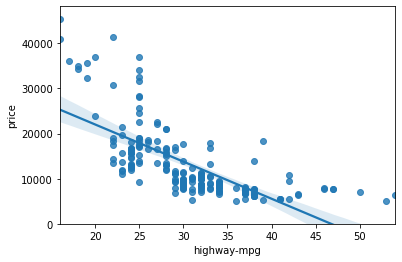

In [41]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

## We will now look at Residual plots
We use this to figure out if a linear plot for our data is appropriate.  
Let's look at some examples.

![Pearson_correlation](images/res1.PNG)

![Pearson_correlation](images/res2.PNG)

![Pearson_correlation](images/res3.PNG)

This final result suggest that our model itself is flawed.  
Knowing this, let's look at the residual plot for our data set for highway-mpg to price.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

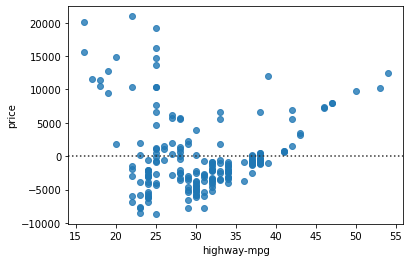

In [42]:
sns.residplot(x=df["highway-mpg"], y=df["price"])

We can see that the resulting residual plot has a curvature so a linear plot is probably not appropriate here.

## Distribution plots
This plots the predictive values (yhat) vs the actual values.  
In this way we can assess the accuracy of our predictions.  
We do this by grouping the values.  

![Pearson_correlation](images/dis1.PNG)

However, these values are continuous not discrete so we should plot to a distribution

![Pearson_correlation](images/dis2.PNG)

Looking at an example we can see that the predictions for price range from 40,000 to 50,000 are inaccurate.  
Whereas the predictions for the price range 10,000 and 20,000 are far more accurate.  
For the below data we are only using a single variable in the predictions  

![Pearson_correlation](images/dis3.PNG)

Let's compare the above output to a residual plot where we use multiple values for the prediction


<AxesSubplot:xlabel='price', ylabel='Density'>

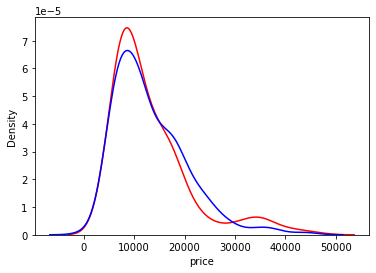

In [43]:
ax1 = sns.kdeplot(df["price"], color="r", label="Actual Value")
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
sns.kdeplot(lm.predict(z), color="b", label="Fitted Values", ax =ax1)

This provides a much better fit.

So earlier we found that under certain circumstances a linear model is not the best fit for predictions.  
Another model we can use is

## Polynomial Regression

![Pearson_correlation](images/poly1.PNG)

There are multiple orders of polynomial regression.  
Choosing the right order is important to match your data set.  

![Pearson_correlation](images/pol2.PNG)

So let's calculate a 6th order polynomial against our data set.  
Note this does not fit the data well, it is just to show the process.  


In [44]:
f=np.polyfit(df["horsepower"], df["price"], 6)
p=np.poly1d(f)
print(p)

           6            5           4         3       2
4.855e-08 x - 4.42e-05 x + 0.01594 x - 2.907 x + 282 x - 1.365e+04 x + 2.635e+05


We can also have multi dimensional polynomial linear regression.  
However numpy can not do this so we rely on the preprocessing library in scikit-learn.  
Let's do a simple second degree polynomial regression.


In [45]:
from sklearn.preprocessing import PolynomialFeatures

# first we create the polynomial feature object using a constructor
pr = PolynomialFeatures(degree=2)
# we then train and transoform this data into an array
pr.fit_transform([[1,2]],)

array([[1., 1., 2., 1., 2., 4.]])

![Pearson_correlation](images/pol2.PNG)

We may need to perform standardisation on our data set, as different features will have different scaling.  
As an example an employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 10000-80000.  

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.  
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).  
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).  

We can do this for all features simultaneously using the preprocessing function StandardScaler.

In [46]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
# we fit and transform the object
scale = s.fit_transform(df[["horsepower", "highway-mpg"]])

We can simplify our code with the use of pipelines  
An example of the steps we may use to get a prediction are

![Pearson_correlation](images/pipe1.PNG)

Pipelines sequentially perform as series of transformations (for example normalisation + polynomial transform).  
The pipeline then goes on to make the prediction (for example using linear regression)

![Pearson_correlation](images/pipe2.PNG)


Let's give it a try using the modules we used earlier

In [47]:
from sklearn.pipeline import Pipeline

# creat our list of typles for each module
# first element is the estimator modle
# second element is the model constructor

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree=2)), ("mode",LinearRegression())]

# we use the pipeline constructor to create a pipeline object

pipe=Pipeline(Input)

# we then train the pipelin object with our data frame
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
pipe.fit(z, y)

# we can now make a prediction
x = pd.DataFrame(np.array([[100, 2546.2, 140.6, 27]]))
pipe.predict(x)


array([[13496.7471108]])

![Pearson_correlation](images/pipe3.PNG)

# We will now look at in-sample (numerical) evaluation for our models

In sample evaluation tells us how closely our model fits the data used to train it.

Two important measures to determine the fir of a model are:
- Mean Squared Error (MSE)
- R-Squared (R^2) or The Coefficient of Determination

Let's take a look at how we calculate the MSE.  
The closer the returned value is to 0 the more accurate our model

In [48]:
from sklearn.metrics import mean_squared_error

# we set our actual results
y_actual = df["price"]

# we build our prediction

# create a linear regression object
lm=LinearRegression()
# predictor variable
x = df[["engine-size"]]
# target variable
y = df["price"]
# then we fit the model
lm.fit(x, y)

a = lm.predict(pd.DataFrame(columns=["engine-size"], data = df[["engine-size"]]))

mean_squared_error(df["price"], a)



15021126.02517414

Now let's look at R^2

It is a measure to determine how close the actual data is to a fitted line for a model.  
The closer the returned value is to 1 the better fit the model.  
It is calculated as follows.

![Pearson_correlation](images/r2.PNG)

![Pearson_correlation](images/r3.PNG)

So this is a good fit, let's take a look at an example using our data set.

In [49]:
x = df[["engine-size"]]
y = df[["price"]]

lm.fit(x, y)
lm.score(x,y)

0.7609686443622008

so a simple linear model for highway-mpg and price is a reasonable fit.

## If we want to determine if our model is a good fit we need to

1. Check our predictions make sense
2. Use visualisations to confirm
3. Use numeric measures to confirm
4. Compare to other models


# We will now look at model evaluation and refinement

In particular

- Over-fitting and Under-fitting
- Ridge Regression
- Grid Search
- Model Refinement

So in order to see how our model should perform in the real world we need to split our dataset.

![Pearson_correlation](images/mod_eval.PNG)

we can do this using the sklearn train_test_split function, it takes the following parameters
- x_data = features (independent variables)
- y_data = data set target ( df["price"] )
- test_size = the percentage of the sample to go to the test split
- random_state = a random seed for random data set splitting

This outputs an array

- x_train and y_train = training data sets
- x_test and y_test = training data sets

train_test_split(x_data, y_data, test_size=0.3, random_state=0


In [50]:
from sklearn.model_selection import train_test_split

# we start by removing "price from our x data frame"
y_data = df['price']
x_data=df.drop('price',axis=1)

train_test_split(x, y, test_size=0.3, random_state=0)

[     engine-size
 99           120
 185          109
 20            90
 157           98
 95            97
 ..           ...
 70           183
 196          141
 120           90
 50            91
 176          122
 
 [140 rows x 1 columns],
      engine-size
 19            90
 174          110
 110          152
 101          181
 181          161
 ..           ...
 31            92
 164           98
 41           110
 59           122
 135          121
 
 [61 rows x 1 columns],
      price
 99    8949
 185   8195
 20    6575
 157   7198
 95    7799
 ..     ...
 70   31600
 196  15985
 120   6229
 50    5195
 176  10898
 
 [140 rows x 1 columns],
      price
 19    6295
 174  10698
 110  13860
 101  13499
 181  15750
 ..     ...
 31    6855
 164   8238
 41   12945
 59    8845
 135  15510
 
 [61 rows x 1 columns]]

There is an issue with this type of validation however, and it is due to the split used for training and testing.

If the larger section of the data set is used for training lets say 90% , as you repeat the test you will find  
that your results are accurate but not very precise.

![Pearson_correlation](images/split1.PNG)

Whereas if this ratio was flipped so 90% of the data set used for testing, you will find the inverse,  
high precision and low accuracy.

![Pearson_correlation](images/split2.PNG)

There is a way however to mitigate this and that is by using cross validation.

For cross validation we split the data set up into folds.  
Each fold is then used for testing and training until each fold has been used for each function.  
On each test we get an evaluation metric for the model.  
We then take the average of these metrics.  

So in the example below is using four folds.

![Pearson_correlation](images/split3.PNG)

We can implement cross validation using the sklearn cross_val_score function.  
It takes the following parameters

- model_type = the model to be used for the cross-validation
- x_data = features (independent variables)
- y_data = data set target ( df["price"] )
- cv = the number of folds to be used

cross_val_score(model_type, x_data, y_data, cv=3)

In [51]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()

x = df[["engine-size"]]
y = df[["price"]]

scores = cross_val_score(lr, x, y, cv=3)

scores

array([0.73696899, 0.78828634, 0.45739309])

This returned to us three scores due to us using 3 folds.  
So let's now take the average of these.

In [52]:
np.mean(scores)

0.6608828073225953

We can use a similar technique but instead of returning an evaluation metric we return a prediction.

In [53]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr, x, y, cv=3)

# remove below comment, and re-run section to see array
# yhat

## We will now look at Overfitting, Underfitting and Model Selection

Underfitting is where the model is not complex enough to fit the data.  
As is shown by using a linear function below.  
The red boxes show the areas of error.  

![Pearson_correlation](images/fit1.PNG)

Overfitting is where the model is to complex and although it performs well at tracking the data points it also creates noise.  
This is shown by using a 16th order polynomial below.  
The noise is shown by red.

![Pearson_correlation](images/fit2.PNG)

If we change the polynomial to an 8th order we see it fits the model far better

![Pearson_correlation](images/fit3.PNG)

So how do we decide what polynomial to use, well we can calculate the R^2 for each and find where it is closest to 1.

Text(3, 0.75, 'Maximum R^2 ')

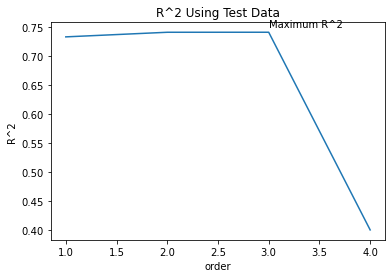

In [54]:
# create a list to store our results
Rsqu_test = []
# create a list to iterate through for each polynomial
order = []

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

for i in range(1,5):
    order.append(i)
# itterate though each polynomial and store the result
for n in order:
    # create the polynomial object
    pr = PolynomialFeatures(degree=n)
    # create our polynomial training data
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    # create our polynomial testing data
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])
    # fit our training data 
    lr.fit(x_train_pr, y_train)
    # append our results using the testing data     
    Rsqu_test.append(lr.score(x_test_pr, y_test))

Rsqu_test

# we then plot the results to find the best value for r^2

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

So we can see that a 3rd order polynomial fits the data set the best by returning the  value closest to 1.

## We will now look at Ridge Regression

We use ridge regression to prevent overfitting with regards to outliers in our data.  
With the below data set we can see that a 4th order polynomial fits the data set well.

![Pearson_correlation](images/rd1.PNG)

If we try to fit a 10th order polynomial (blue) we sit it fits the data better expect for where we have the outlier.

![Pearson_correlation](images/rd2.PNG)

We can reduce the influence this outlier has on the model by using Ridge regression.  
This is done by introducing a new variable to the polynomial equation, commonly denoted by Alpha.
We need to be careful with the value we provide to Alpha, if it is to high it will cause our model to underfit.

Below is the same polynomial but with an Alpha value of 0.01 .  
This seems to fit our data set well

![Pearson_correlation](images/rd3.PNG)

We can see that if we increase Alpha any further, such as to 1 below, we start to see the underfitting issue.

![Pearson_correlation](images/rd4.PNG)

We can once again use cross validation in order to help us determine the correct Alpha value to use.

In [55]:
from sklearn.linear_model import Ridge
from warnings import filterwarnings

# we set our polynomial to 11 as determined earlier
pr = PolynomialFeatures(degree=2)

x = df[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
y = df[["price"]]

# we need to clean up normalized-losses
mean = x["normalized-losses"].mean()
x["normalized-losses"] = x["normalized-losses"].replace(np.nan, mean)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RigeModel=Ridge(alpha=0.1, normalize=True)
RigeModel.fit(x_train_pr, y_train)

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,6))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

<ipython-input-55-e337f44fbbce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["normalized-losses"] = x["normalized-losses"].replace(np.nan, mean)


We get a warning here so lets take a look at it.

The first is "A value is trying to be set on a copy of a slice from a DataFrame."

This is quite a wide reaching error, however there is a very good write-up explaining it here;  
https://www.dataquest.io/blog/settingwithcopywarning/

So let's take a look at x and see if our data has been modified as we want it.

In [56]:
x

,horsepower,curb-weight,engine-size,highway-mpg,normalized-losses,symboling
0,111.0,2548,130,27,122.0,3
1,111.0,2548,130,27,122.0,3
2,154.0,2823,152,26,122.0,1
3,102.0,2337,109,30,164.0,2
4,115.0,2824,136,22,164.0,2
...,...,...,...,...,...,...
200,114.0,2952,141,28,95.0,-1
201,160.0,3049,141,25,95.0,-1
202,134.0,3012,173,23,95.0,-1
203,106.0,3217,145,27,95.0,-1


We can see that the NaN has been replaced by the mean of Normalized-losses and stored under x .  
This means the correct data was being used in our modeling so this warning is not applicable here.

So we can temporarily suppress the warning, do not forget to set it back so we get the warning for subsequent analysis

In [57]:
from sklearn.linear_model import Ridge
from warnings import filterwarnings

# Disable warning
pd.set_option('mode.chained_assignment', None)

# we set our polynomial to 11 as determined earlier
pr = PolynomialFeatures(degree=2)

x = df[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
y = df[["price"]]

# we need to clean up normalized-losses
mean = x["normalized-losses"].mean()
x["normalized-losses"] = x["normalized-losses"].replace(np.nan, mean)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RigeModel=Ridge(alpha=0.1, normalize=True)
RigeModel.fit(x_train_pr, y_train)

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = np.array(range(0,10))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

# Enable warning
pd.set_option('mode.chained_assignment', 'warn')

We can then plot the value of r^2, using our range of Alpha values

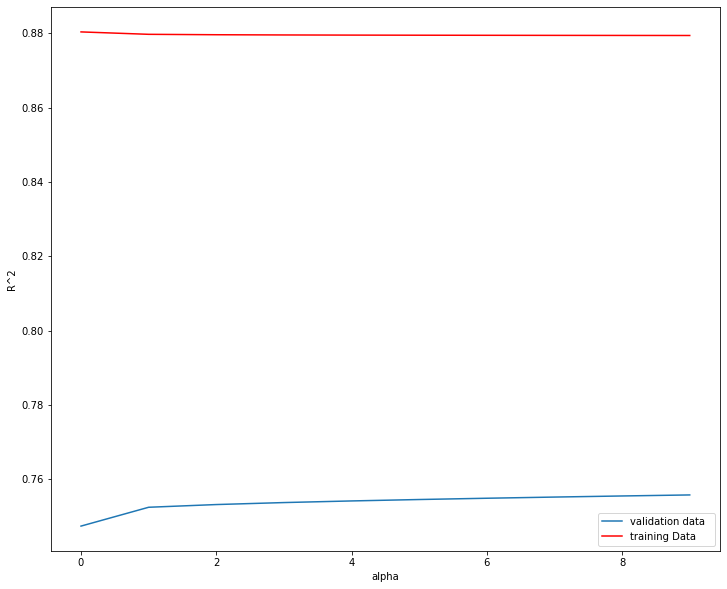

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

We can see that the r^2 value starts to plateau at alpha = 1 for the validation data.  
Also r^2 decreases as alpha increases for the training data.  
So it looks like the sweet spot for alpha is around 1.

## We will now take a look at Grid search

Hyperparameters are parameters that are not used as part of the fitting or training process, such as Alpha in the last section.  
Grid search is an ability in scikit-learn that allows us to calculate appropriate hyperparameters by using cross-validation.

We pass our parameters to Grid search using a Python dictionary.  
The key is the name of the parameter and the related list is the values to iterate through for cross-validation.  
However we can test multiple parameters at the same time, so let's also test the normalize, as well as the Alpha parameters for the Ridge module 

In [59]:
from sklearn.model_selection import GridSearchCV

#remind our selves of our data setts
x = df[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
y = df[["price"]]

# create our parameters for testing
parameters = [{"alpha": [0.001, 0.01, 1, 10, 100, 1000, 10000, 100000, 1000000], "normalize": [True, False] }]
# create our Ridge object
RR = Ridge()
# create our GridSearchCV object
# it takes our (model, params, folds) as arguments
# we will use the default sccoring method of r^2
Grid1 = GridSearchCV(RR, parameters,cv=4)
# fit the oobject
Grid1.fit(x[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y)
# we now find the best values for Alpha
Grid1.best_estimator_

Ridge(alpha=1, normalize=True)

We can also pull some results from our GridSearch, such as the mean testing scores.

In [60]:
scores = Grid1.cv_results_
scores["mean_test_score"]

array([ 0.66503484,  0.6644635 ,  0.6697124 ,  0.66446356,  0.69003165,
        0.66446932,  0.32127636,  0.66452138,  0.01692775,  0.66500981,
       -0.03033681,  0.66797719, -0.03531087,  0.67241124, -0.03581087,
        0.65695446, -0.03586089,  0.60142767])